## 冒泡排序

**最坏时间复杂度：$O(n^2)$**

**最优时间复杂度：$O(n)$**

In [1]:
def bubble_sort(alist):
    """冒泡排序"""
    n = len(alist)
    for j in range(n-1):
        # 从头走到尾走几次
        count = 0
        for i in range(n-1-j):
            # 从头走到尾
            if alist[i] > alist[i+1]:
                alist[i],alist[i+1] = alist[i+1],alist[i]
                count += 1
        if count == 0: #优化：如果遍历一次发现没有任何可以交换的元素
            return

In [2]:
li = [54,13,78,45,69,22,33,22]
print(li)
bubble_sort(li)
print(li)

[54, 13, 78, 45, 69, 22, 33, 22]
[13, 22, 22, 33, 45, 54, 69, 78]


## 选择排序

**最坏时间复杂度：$O(n^2)$**

**最优时间复杂度：$O(n^2)$**

In [1]:
# 从后面的无序序列中选择出最小值放在前面有序序列的末尾
def select_sort(alist):
    """选择算法"""
    n = len(alist)
    for i in range(n-1):
        min_index = i
        for j in range(i+1,n): # 每次循环选择出最小值的位置
            if alist[min_index] > alist[j]:
                min_index = j
        alist[i],alist[min_index] = alist[min_index],alist[i]

In [13]:
li1 = [54,13,78,45,69,22,33,22]
print(li1)
select_sort(li1)
print(li1)

[54, 13, 78, 45, 69, 22, 33, 22]
[13, 22, 22, 33, 45, 54, 69, 78]


## 插入排序

**最坏时间复杂度：$O(n^2)$**

**最优时间复杂度：$O(n)$**

In [4]:
# 从后面无序序列中依次拿出元素插入到前面有序序列的合适位置
def insert_sort(alist):
    """插入算法"""
    n = len(alist)
    #从后面的无序序列中拿出多少元素插入前面的有序序列
    for i in range(1,n): 
        #拿出的元素放在有序序列末尾并向前进行排序
        for j in range(i,0,-1): 
            if alist[j] < alist[j-1]:
                alist[j],alist[j-1] = alist[j-1],alist[j]
            else:
                break
    ###############################
    #n = len(alist)
    #for i in range(1,n):
        #j = i
        #while j>0:
            #if alist[j] < alist[j-1]:
                #alist[j],alist[j-1] = alist[j-1],alist[j]
                #i -= 1
            #else:
                #break

In [5]:
li2 = [54,13,78,45,69,22,33,22]
print(li2)
insert_sort(li2)
print(li2)

[54, 13, 78, 45, 69, 22, 33, 22]
[13, 22, 22, 33, 45, 54, 69, 78]


## 希尔排序

- 分组的插入算法

**最坏时间复杂度：$O(n^2)$**

**最优时间复杂度：根据步长序列不同而不同**

In [10]:
def shell_sort(alist):
    n = len(alist)
    gap = n // 2
    # gap变化到0之前，插入算法执行的次数
    # 当gap=1时，就是普通的插入算法
    while gap >= 1:
        # 与插入算法的区别在于gap
        for i in range(gap,n):
            j = i
            while j>0:
                if alist[j] < alist[j-gap]:
                    alist[j],alist[j-gap] = alist[j-gap],alist[j]
                    j -= gap
                else:
                    break
        # 缩短步长
        gap //= 2

In [11]:
li3 = [54,13,78,45,69,22,33,22,1]
print(li3)
shell_sort(li3)
print(li3)

[54, 13, 78, 45, 69, 22, 33, 22, 1]
[1, 13, 22, 22, 33, 45, 54, 69, 78]


## 快速排序

**最坏时间复杂度：$O(n^2)$**

**最优时间复杂度：$O(n\log n)$** 【二分法】

In [33]:
# 序列里的第一个元素，其左边为比它小的值，右边为比它大的值，然后以该元素分割，左右分别按同样的思想，直至分为单个元素
def quick_sort(alist,start,end):
    """快速排序"""
    if start >= end:
        return
    low = start
    high = end
    mid_value = alist[start]
    
    while low < high:
        # high 左移
        while low < high and alist[high] >= mid_value:
            high -= 1
        alist[low] = alist[high]
        
        # low 右移
        while low < high and alist[low] < mid_value:
            low += 1
        alist[high] = alist[low]
    # 从循环退出时，low = high
    alist[low] = mid_value
    
    # 递归
    # 对low左边进行快速排序
    quick_sort(alist,start,low-1)
    # 对low右边进行快速排序
    quick_sort(alist,low+1,end)

In [34]:
li4 = [54,13,78,45,69,22,33,22,1]
print(li4)
n = len(li4)
quick_sort(li4,0,n-1)
print(li4)

[54, 13, 78, 45, 69, 22, 33, 22, 1]
[1, 13, 22, 22, 33, 45, 54, 69, 78]


## 归并排序

**最坏时间复杂度：$O(n\log n)$**

**最优时间复杂度：$O(n\log n)$** 

In [4]:
# 将序列分解最小后，然后合并两个进行排序后的有序序列
# 比较两个序列最前面的数，谁小就先取谁，取了后相应的指针就后移一位，继续比较，直至一个数组为空，最后把另一个数组剩余的部分复制过来即可
def merge_sort(alist):
    """归并排序"""
    n = len(alist)
    mid = n // 2
    if n <= 1:
        return alist
    # left 采用归并排序后形成的有序新列表
    left_li = merge_sort(alist[:mid])
    # right 采用归并排序后形成的有序新列表
    right_li = merge_sort(alist[mid:])
    
    # 将两个有序的子序列合并为一个新的整体
    left_pointer, right_pointer = 0, 0
    result = []
    
    while left_pointer < len(left_li) and right_pointer < len(right_li):
        if left_li[left_pointer] <= right_li[right_pointer]:
            result.append(left_li[left_pointer])
            left_pointer += 1
        else:
            result.append(right_li[right_pointer])
            right_pointer += 1
            
    result += left_li[left_pointer:]
    result += right_li[right_pointer:]
    return result
    

In [5]:
li5 = [54,13,78,45,69,22,33,22,1]
print(li5)
li_sort = merge_sort(li5)
print(li5)
print(li_sort)

[54, 13, 78, 45, 69, 22, 33, 22, 1]
[54, 13, 78, 45, 69, 22, 33, 22, 1]
[1, 13, 22, 22, 33, 45, 54, 69, 78]


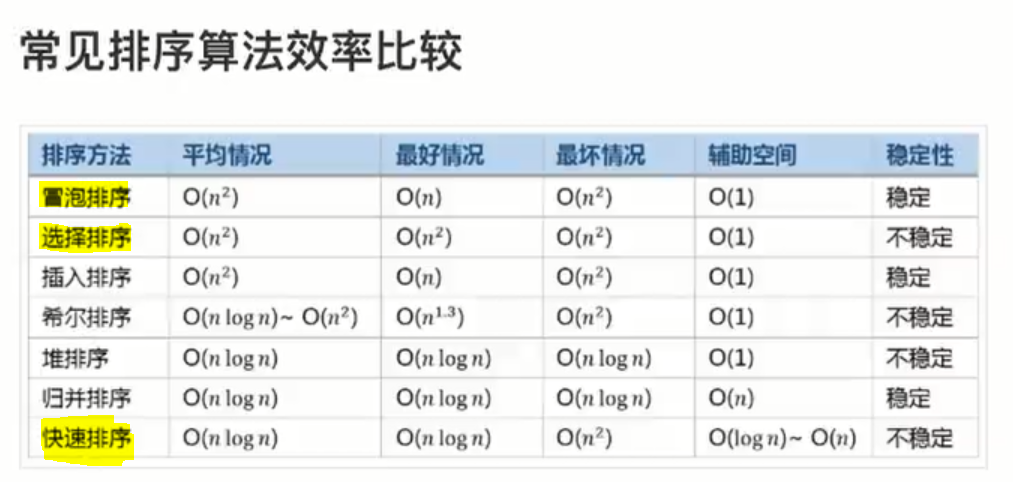